# Import

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

# DS

In [82]:
data = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | 1 - women; 2 - men | 
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [84]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Outliers

In [86]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data[((data >= lower_bound) & (data <= upper_bound)).all(axis=1)]

print("before outliers removing:", data.shape)
print("after outliers removing:", data_cleaned.shape)

before outliers removing: (70000, 12)
after outliers removing: (38023, 12)


In [87]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38023 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          38023 non-null  int64  
 1   gender       38023 non-null  int64  
 2   height       38023 non-null  int64  
 3   weight       38023 non-null  float64
 4   ap_hi        38023 non-null  int64  
 5   ap_lo        38023 non-null  int64  
 6   cholesterol  38023 non-null  int64  
 7   gluc         38023 non-null  int64  
 8   smoke        38023 non-null  int64  
 9   alco         38023 non-null  int64  
 10  active       38023 non-null  int64  
 11  cardio       38023 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 3.8 MB


In [88]:
data_cleaned

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
13,17668,1,158,71.0,110,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
99991,19699,1,172,70.0,130,90,1,1,0,0,1,1


# Correlations

In [105]:
correlation = data.corr(numeric_only=True)
correlation

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


# Regression

In [114]:
X_cleaned = data_cleaned[['age', 'gender', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']] #features
y_cleaned = data_cleaned['cardio']  #target

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

logistic_reg_model_cleaned = LogisticRegression()
logistic_reg_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

y_pred_cleaned = logistic_reg_model_cleaned.predict(X_test_cleaned)

accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
precision_cleaned = precision_score(y_test_cleaned, y_pred_cleaned)
recall_cleaned = recall_score(y_test_cleaned, y_pred_cleaned)
f1_cleaned = f1_score(y_test_cleaned, y_pred_cleaned)
roc_auc_cleaned = roc_auc_score(y_test_cleaned, y_pred_cleaned)

print("Logistic Regression Model Performance with Cleaned Data:")
print("Accuracy:", accuracy_cleaned.round(2))
print("Precision:", precision_cleaned.round(2))
print("Recall:", recall_cleaned.round(2))
print("F1 Score:", f1_cleaned.round(2))
print("ROC AUC Score:", roc_auc_cleaned.round(2))

Logistic Regression Model Performance with Cleaned Data:
Accuracy: 0.63
Precision: 0.64
Recall: 0.48
F1 Score: 0.55
ROC AUC Score: 0.62


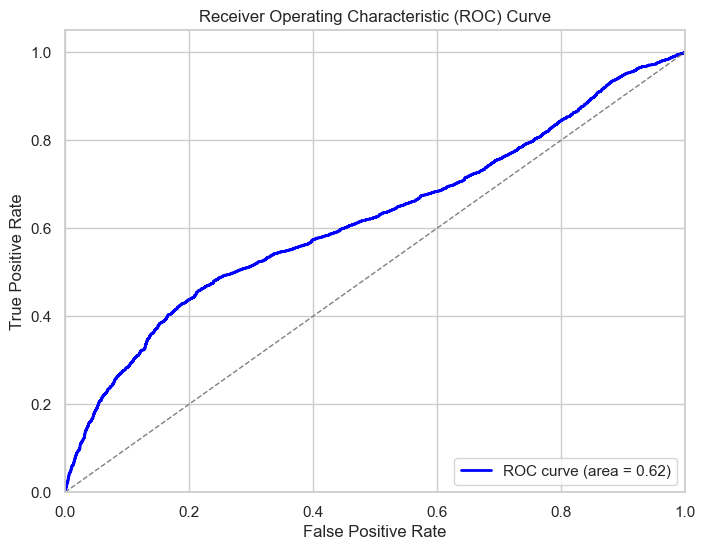

In [117]:
# ROC-curve values
fpr, tpr, thresholds = roc_curve(y_test_cleaned, logistic_reg_model_cleaned.predict_proba(X_test_cleaned)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()